In [48]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [49]:
df = pd.read_csv('sponsor.csv')
df.head()

,SponsorID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageID,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS,ROI
0,1005,Acme Inc.,Technology,Large,Title,SP1,Platinum,150000,"Branding, Advertising, Hospitality",Social Media,75000,2000000,50000,20000,1000,2000,500000,90,150000,120000,2,25
1,1006,Beta Corp.,Finance,Medium,Presenting,SP2,Gold,100000,"Branding, Hospitality",Email,50000,1000000,25000,10000,500,1000,250000,80,100000,80000,2,25
2,1007,Gamma LLC,Retail,Small,Supporting,SP3,Silver,50000,Branding,Print,25000,500000,12500,5000,250,500,125000,70,50000,40000,2,25
3,1008,Delta Enterprises,Healthcare,Large,Title,SP4,Platinum,200000,"Branding, Advertising, Hospitality, Workshops",Social Media,100000,3000000,75000,30000,1500,3000,750000,95,200000,160000,2,25
4,1009,Epsilon Industries,Manufacturing,Medium,Presenting,SP5,Gold,75000,"Branding, Sampling",Email,37500,750000,18750,7500,375,750,187500,75,75000,60000,2,25


In [50]:
df['SponsorID'] = df.reset_index().index + 1005
df

,SponsorID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageID,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS,ROI
0,1005,Acme Inc.,Technology,Large,Title,SP1,Platinum,150000,"Branding, Advertising, Hospitality",Social Media,75000,2000000,50000,20000,1000,2000,500000,90,150000,120000,2,25
1,1006,Beta Corp.,Finance,Medium,Presenting,SP2,Gold,100000,"Branding, Hospitality",Email,50000,1000000,25000,10000,500,1000,250000,80,100000,80000,2,25
2,1007,Gamma LLC,Retail,Small,Supporting,SP3,Silver,50000,Branding,Print,25000,500000,12500,5000,250,500,125000,70,50000,40000,2,25
3,1008,Delta Enterprises,Healthcare,Large,Title,SP4,Platinum,200000,"Branding, Advertising, Hospitality, Workshops",Social Media,100000,3000000,75000,30000,1500,3000,750000,95,200000,160000,2,25
4,1009,Epsilon Industries,Manufacturing,Medium,Presenting,SP5,Gold,75000,"Branding, Sampling",Email,37500,750000,18750,7500,375,750,187500,75,75000,60000,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1602,Radiant Ventures,Technology,Medium,Presenting,SP601,Gold,4300000,"Branding, Advertising, Sampling, Workshops",Radio,2150000,43000000,1075000,430000,21500,43000,10750000,85,4300000,3440000,2,25
598,1603,Sirius Enterprises,Telecommunications,Small,Supporting,SP602,Silver,3300000,"Branding, Sampling",Social Media,1650000,33000000,825000,330000,16500,33000,8250000,75,3300000,2640000,2,25
599,1604,Twilight Industries,Finance,Large,Title,SP603,Diamond,19500000,"Branding, Advertising, Hospitality",TV,9750000,325000000,8125000,3250000,162500,325000,81250000,95,19500000,15600000,2,25
600,1605,Ultraviolet Technologies,Retail,Medium,Presenting,SP604,Platinum,6250000,"Branding, Hospitality, Workshops",Online,3125000,62500000,1562500,625000,31250,62500,15625000,85,6250000,5000000,2,25


In [51]:
import random

# Generate random values for ROI
df['ROI'] = [random.randint(1, 25) for _ in range(len(df))]

# Print the updated DataFrame
print(df)


     SponsorID               SponsorName     SponsorIndustry SponsorSize  \
0         1005                 Acme Inc.          Technology       Large   
1         1006                Beta Corp.             Finance      Medium   
2         1007                 Gamma LLC              Retail       Small   
3         1008         Delta Enterprises          Healthcare       Large   
4         1009        Epsilon Industries       Manufacturing      Medium   
..         ...                       ...                 ...         ...   
597       1602          Radiant Ventures          Technology      Medium   
598       1603        Sirius Enterprises  Telecommunications       Small   
599       1604       Twilight Industries             Finance       Large   
600       1605  Ultraviolet Technologies              Retail      Medium   
601       1606          Volt Enterprises              Energy       Small   

    SponsorType SponsorshipPackageID SponsorshipPackageName  \
0         Title         

In [52]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features.remove('SponsorID')
numerical_features

['AdvertisingSpend',
 'Impressions',
 'Clicks',
 'Engagement',
 'BrandExposure',
 'AttendeeEngagement',
 'BrandAwarenessMetrics',
 'SponsorshipRevenue',
 'SponsorshipCosts',
 'ROAS',
 'ROI']

In [53]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 ]
discrete_feature

['BrandAwarenessMetrics', 'ROAS']

In [54]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['EventID']]
continuous_feature

['AdvertisingSpend',
 'Impressions',
 'Clicks',
 'Engagement',
 'BrandExposure',
 'AttendeeEngagement',
 'SponsorshipRevenue',
 'SponsorshipCosts',
 'ROI']

In [55]:
df

,SponsorID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageID,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS,ROI
0,1005,Acme Inc.,Technology,Large,Title,SP1,Platinum,150000,"Branding, Advertising, Hospitality",Social Media,75000,2000000,50000,20000,1000,2000,500000,90,150000,120000,2,12
1,1006,Beta Corp.,Finance,Medium,Presenting,SP2,Gold,100000,"Branding, Hospitality",Email,50000,1000000,25000,10000,500,1000,250000,80,100000,80000,2,1
2,1007,Gamma LLC,Retail,Small,Supporting,SP3,Silver,50000,Branding,Print,25000,500000,12500,5000,250,500,125000,70,50000,40000,2,13
3,1008,Delta Enterprises,Healthcare,Large,Title,SP4,Platinum,200000,"Branding, Advertising, Hospitality, Workshops",Social Media,100000,3000000,75000,30000,1500,3000,750000,95,200000,160000,2,16
4,1009,Epsilon Industries,Manufacturing,Medium,Presenting,SP5,Gold,75000,"Branding, Sampling",Email,37500,750000,18750,7500,375,750,187500,75,75000,60000,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1602,Radiant Ventures,Technology,Medium,Presenting,SP601,Gold,4300000,"Branding, Advertising, Sampling, Workshops",Radio,2150000,43000000,1075000,430000,21500,43000,10750000,85,4300000,3440000,2,21
598,1603,Sirius Enterprises,Telecommunications,Small,Supporting,SP602,Silver,3300000,"Branding, Sampling",Social Media,1650000,33000000,825000,330000,16500,33000,8250000,75,3300000,2640000,2,11
599,1604,Twilight Industries,Finance,Large,Title,SP603,Diamond,19500000,"Branding, Advertising, Hospitality",TV,9750000,325000000,8125000,3250000,162500,325000,81250000,95,19500000,15600000,2,5
600,1605,Ultraviolet Technologies,Retail,Medium,Presenting,SP604,Platinum,6250000,"Branding, Hospitality, Workshops",Online,3125000,62500000,1562500,625000,31250,62500,15625000,85,6250000,5000000,2,1


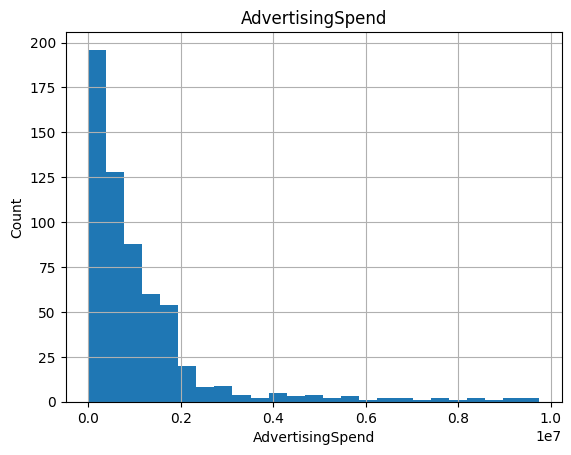

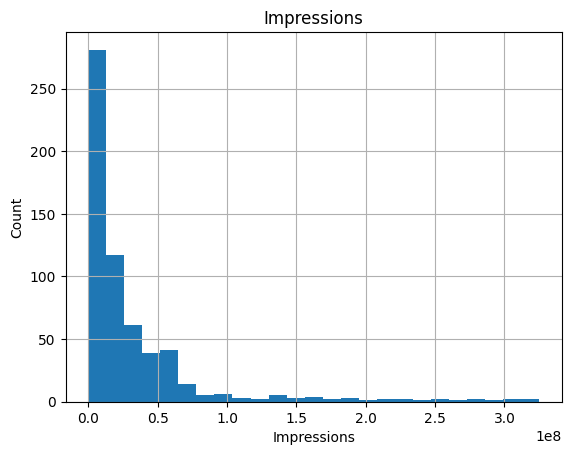

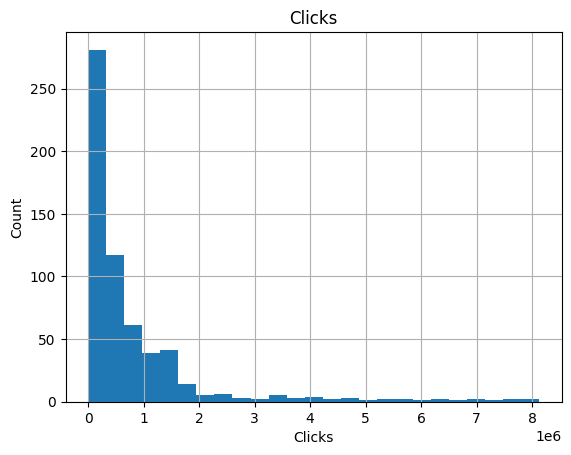

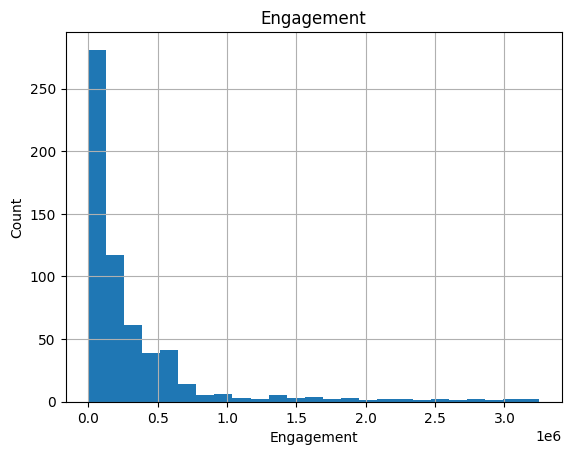

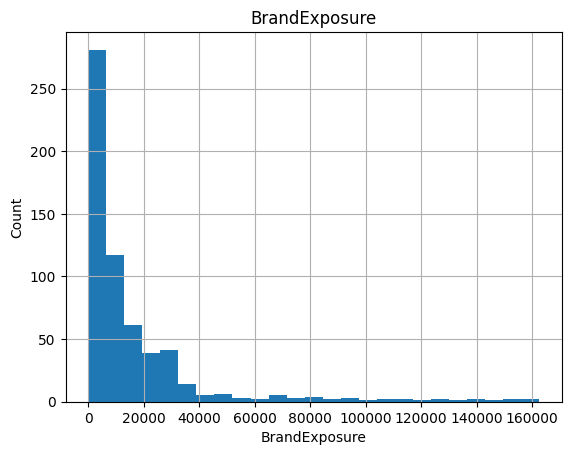

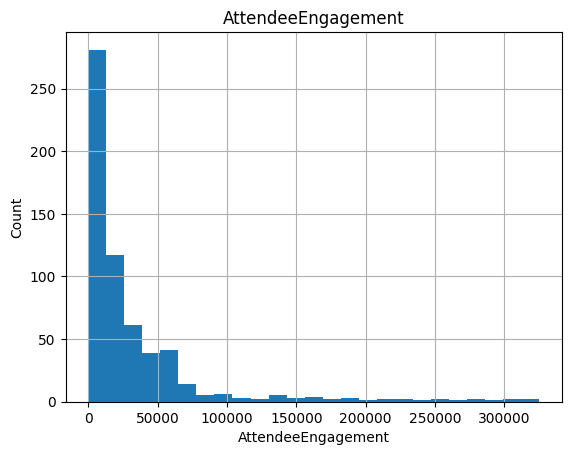

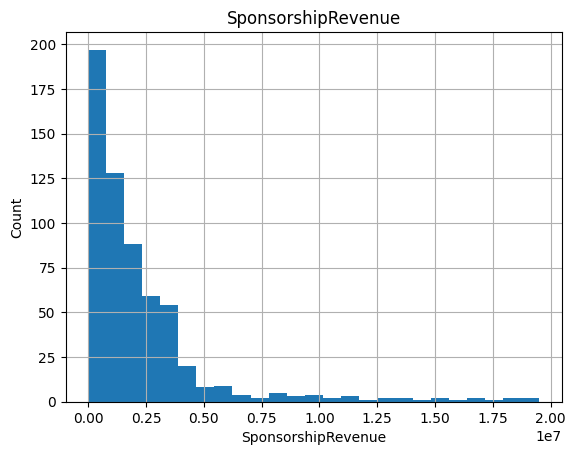

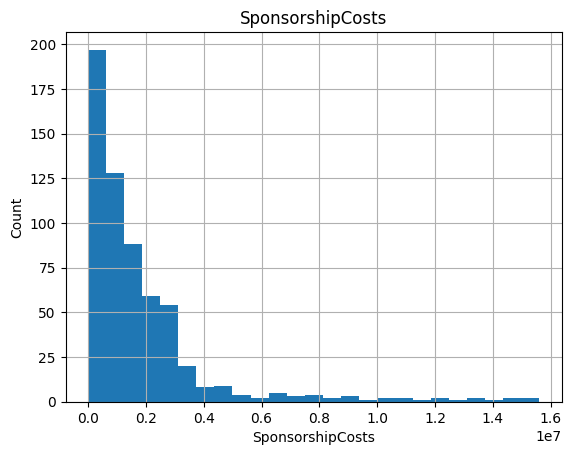

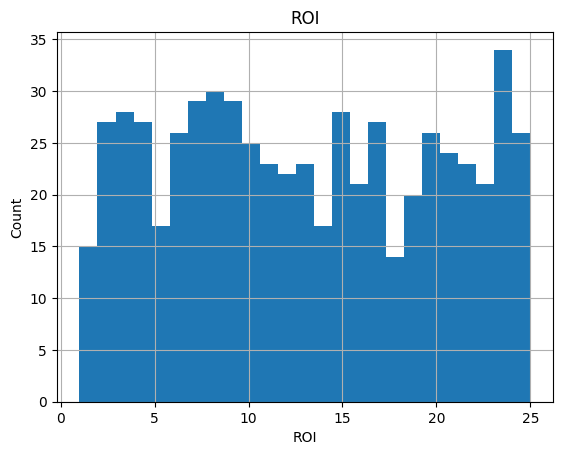

In [56]:
for feature in continuous_feature :
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [57]:
# from dataprep.eda import create_report
# create_report(df).show_browser()

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


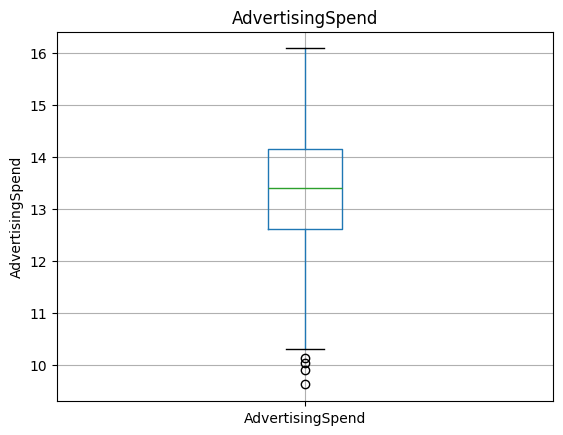

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


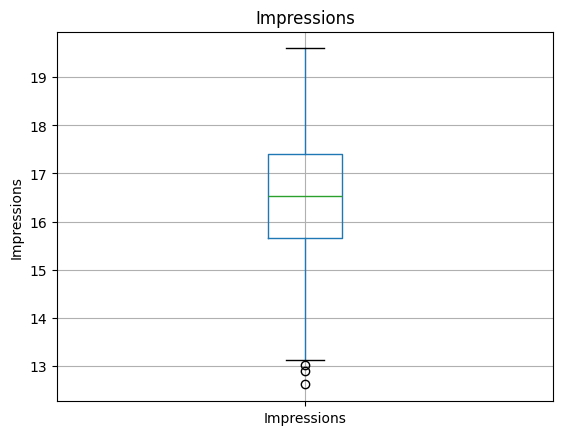

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


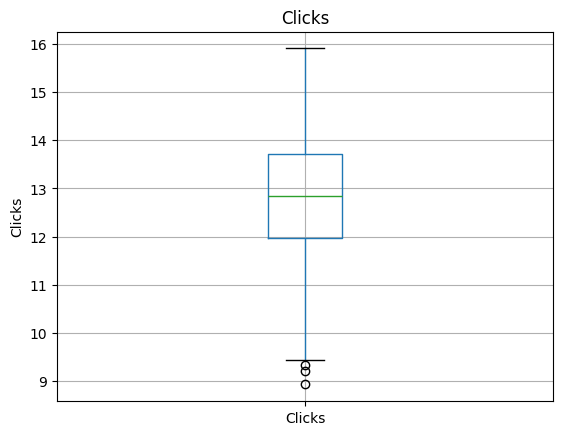

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


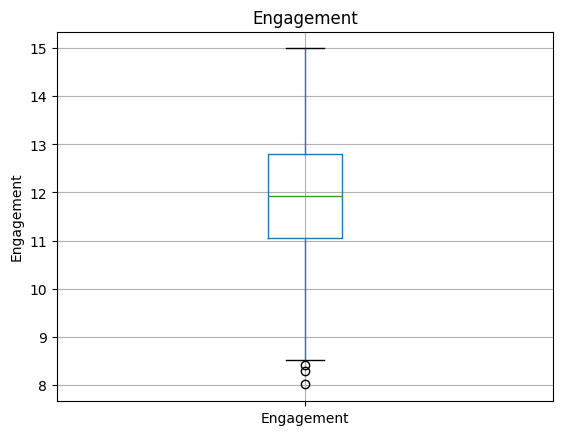

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


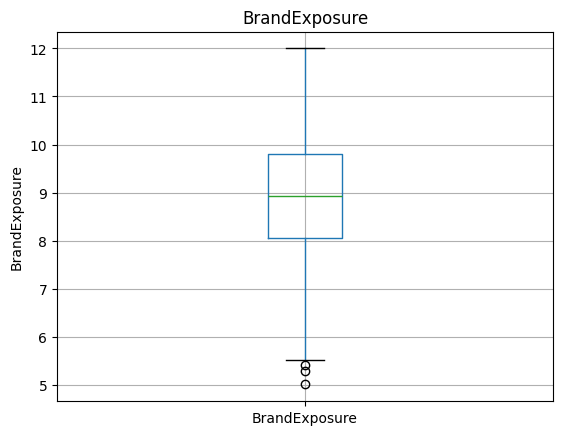

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


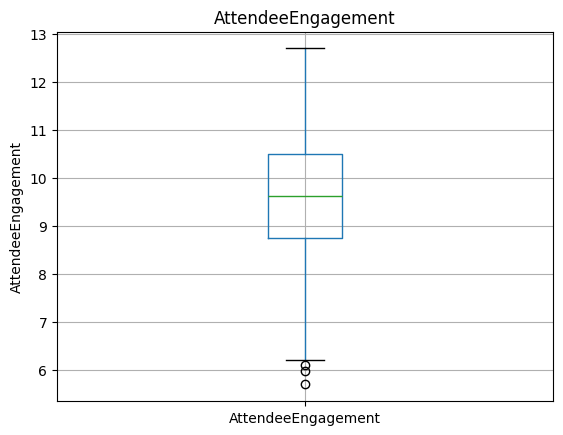

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


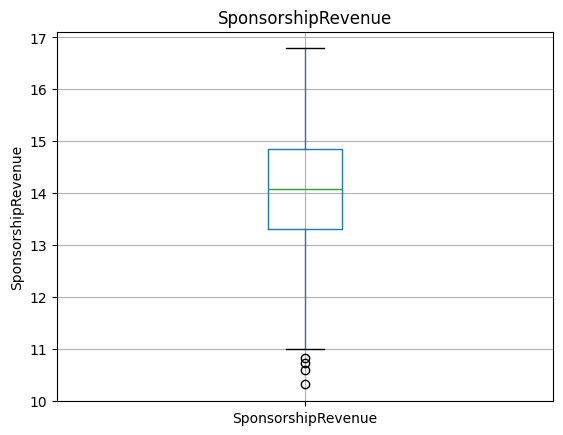

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


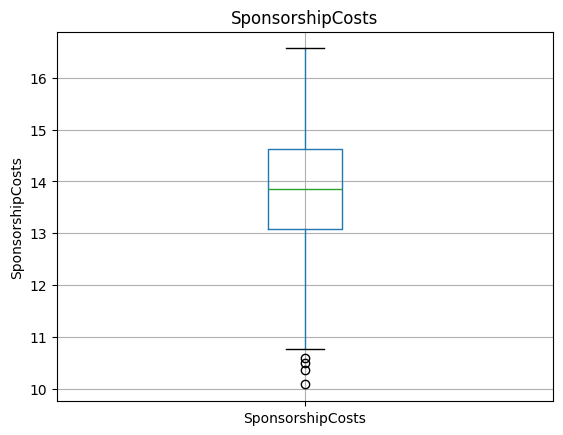

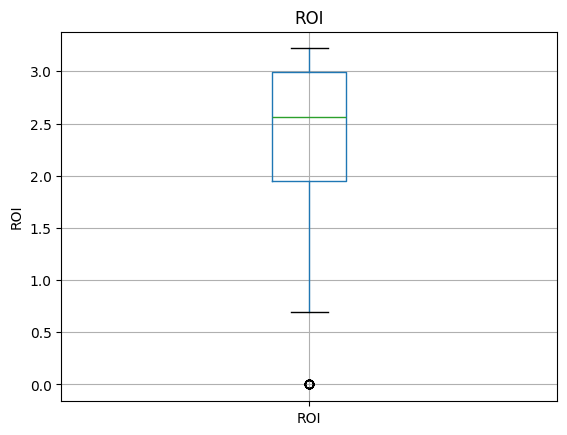

In [58]:
for feature in continuous_feature:
        data=df.copy()
    
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [59]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['SponsorName',
 'SponsorIndustry',
 'SponsorSize',
 'SponsorType',
 'SponsorshipPackageID',
 'SponsorshipPackageName',
 'SponsorshipPackageCost',
 'SponsorshipPackageBenefits',
 'PromotionType',
 'SalesLift']

In [60]:
df[categorical_features].head()


,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageID,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,SalesLift
0,Acme Inc.,Technology,Large,Title,SP1,Platinum,150000,"Branding, Advertising, Hospitality",Social Media,500000
1,Beta Corp.,Finance,Medium,Presenting,SP2,Gold,100000,"Branding, Hospitality",Email,250000
2,Gamma LLC,Retail,Small,Supporting,SP3,Silver,50000,Branding,Print,125000
3,Delta Enterprises,Healthcare,Large,Title,SP4,Platinum,200000,"Branding, Advertising, Hospitality, Workshops",Social Media,750000
4,Epsilon Industries,Manufacturing,Medium,Presenting,SP5,Gold,75000,"Branding, Sampling",Email,187500


In [61]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is SponsorName and number of categories are 352
The feature is SponsorIndustry and number of categories are 9
The feature is SponsorSize and number of categories are 4
The feature is SponsorType and number of categories are 4
The feature is SponsorshipPackageID and number of categories are 600
The feature is SponsorshipPackageName and number of categories are 5
The feature is SponsorshipPackageCost and number of categories are 239
The feature is SponsorshipPackageBenefits and number of categories are 12
The feature is PromotionType and number of categories are 8
The feature is SalesLift and number of categories are 252


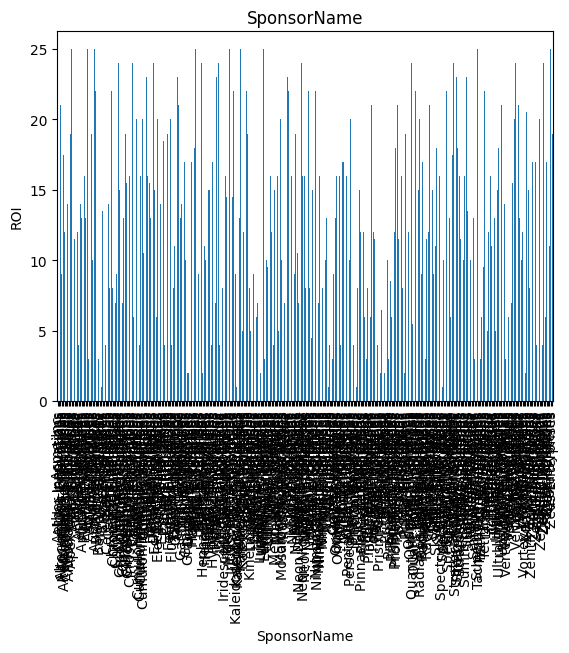

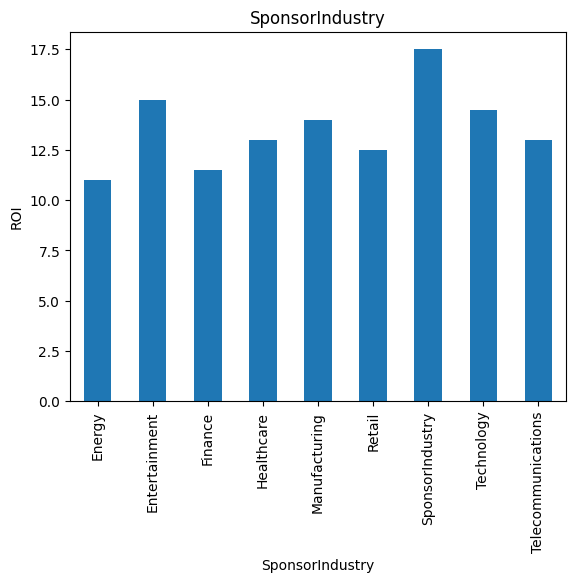

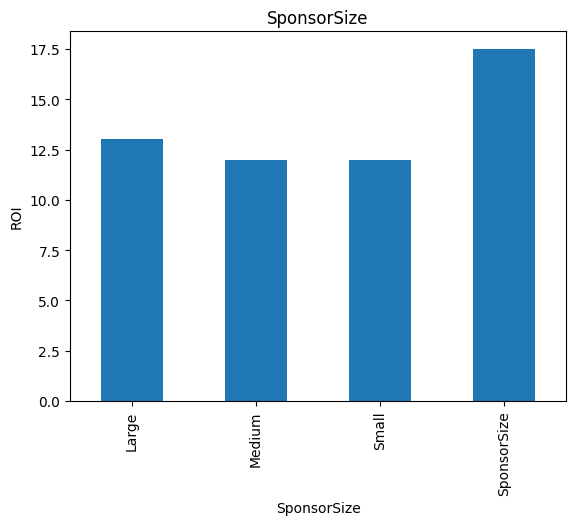

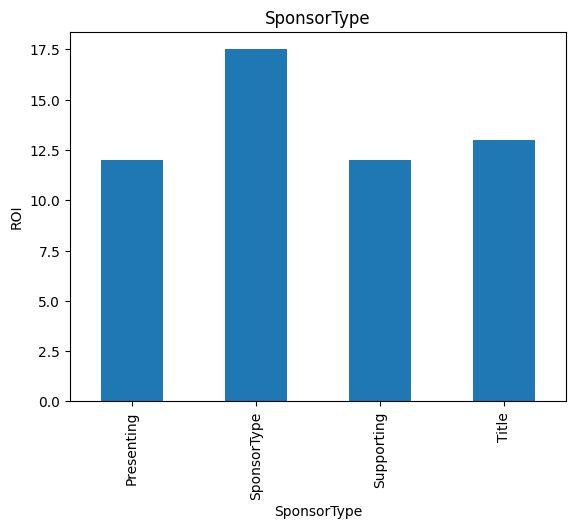

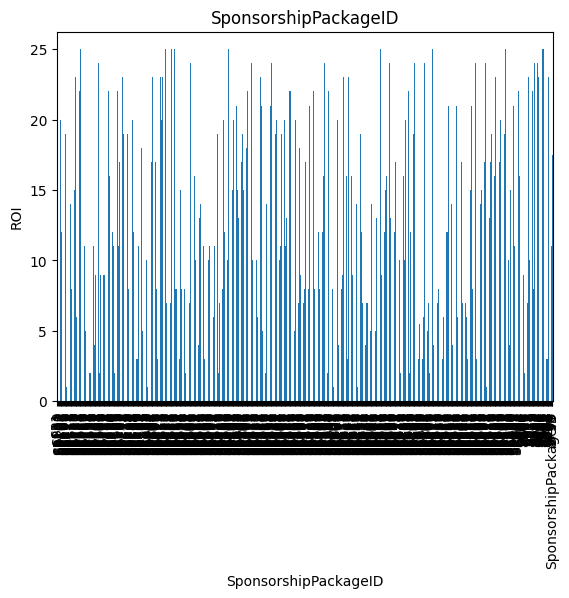

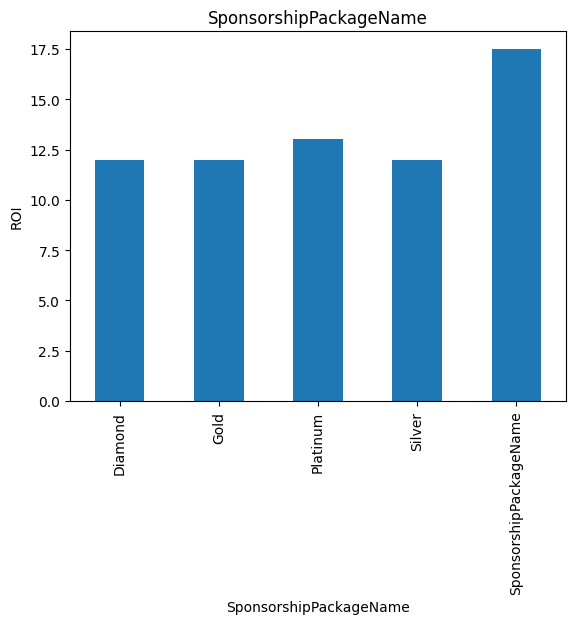

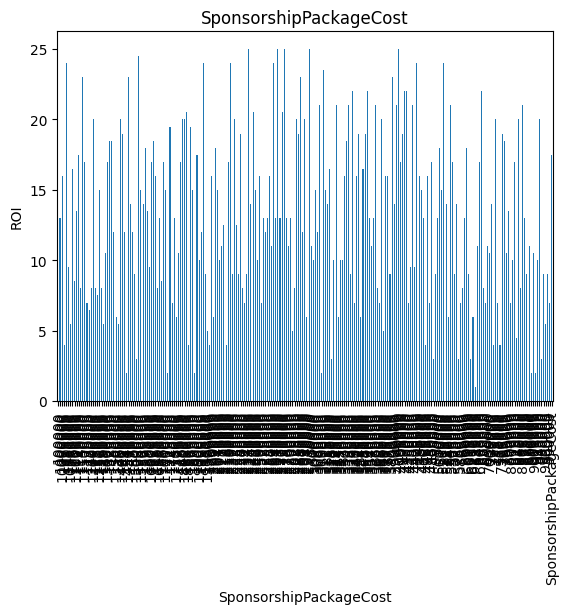

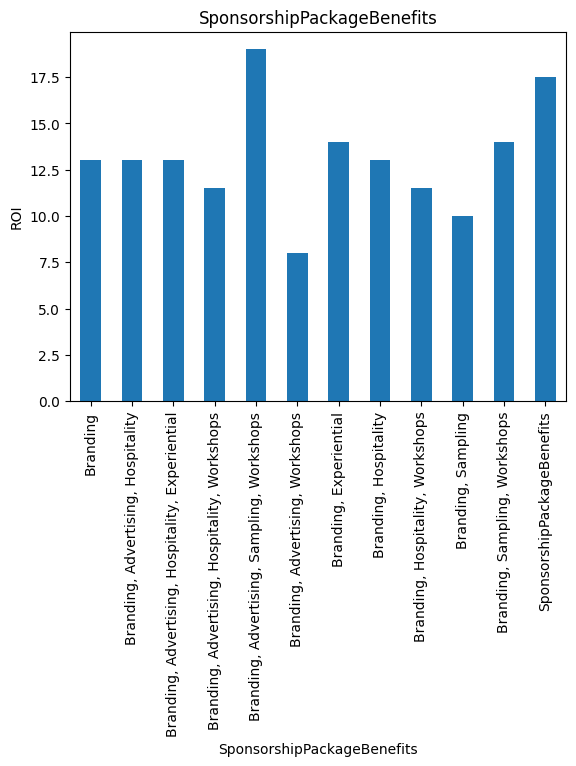

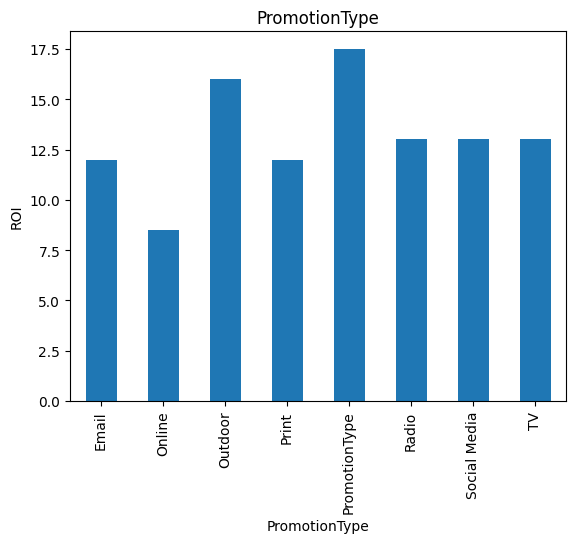

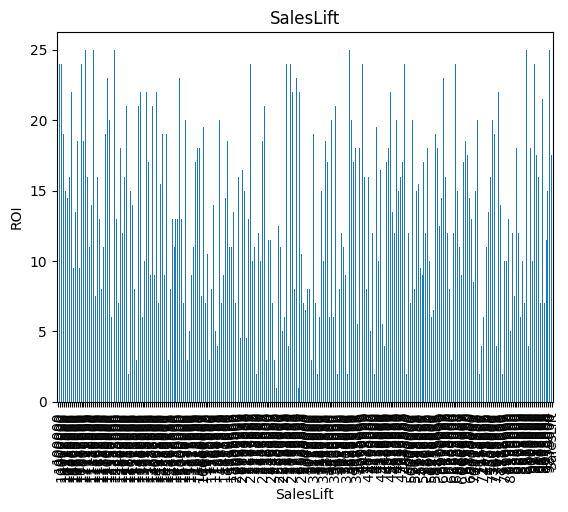

In [62]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['ROI'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('ROI')
    plt.title(feature)
    plt.show()

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df['ROI'],test_size=0.2,random_state=0)

In [64]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

In [65]:

numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']



In [66]:

num_features= numerical_features


In [67]:

for feature in num_features:
    df[feature]=np.log(df[feature])
df.head()


c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,SponsorID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageID,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS,ROI
0,1005,Acme Inc.,Technology,Large,Title,SP1,Platinum,150000,"Branding, Advertising, Hospitality",Social Media,11.225243,14.508658,10.819778,9.903488,6.907755,7.600902,500000,4.499810,11.918391,11.695247,0.693147,2.484907
1,1006,Beta Corp.,Finance,Medium,Presenting,SP2,Gold,100000,"Branding, Hospitality",Email,10.819778,13.815511,10.126631,9.210340,6.214608,6.907755,250000,4.382027,11.512925,11.289782,0.693147,0.000000
2,1007,Gamma LLC,Retail,Small,Supporting,SP3,Silver,50000,Branding,Print,10.126631,13.122363,9.433484,8.517193,5.521461,6.214608,125000,4.248495,10.819778,10.596635,0.693147,2.564949
3,1008,Delta Enterprises,Healthcare,Large,Title,SP4,Platinum,200000,"Branding, Advertising, Hospitality, Workshops",Social Media,11.512925,14.914123,11.225243,10.308953,7.313220,8.006368,750000,4.553877,12.206073,11.982929,0.693147,2.772589
4,1009,Epsilon Industries,Manufacturing,Medium,Presenting,SP5,Gold,75000,"Branding, Sampling",Email,10.532096,13.527828,9.838949,8.922658,5.926926,6.620073,187500,4.317488,11.225243,11.002100,0.693147,1.386294


In [68]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['ROI'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)
df.head()


,SponsorID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageID,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS,ROI
0,1005,172,5,2,2,288,3,82,7,3,11.225243,14.508658,10.819778,9.903488,6.907755,7.600902,134,4.499810,11.918391,11.695247,0.693147,2.484907
1,1006,6,0,0,0,9,1,0,3,1,10.819778,13.815511,10.126631,9.210340,6.214608,6.907755,1,4.382027,11.512925,11.289782,0.693147,0.000000
2,1007,187,2,1,1,297,2,137,9,2,10.126631,13.122363,9.433484,8.517193,5.521461,6.214608,144,4.248495,10.819778,10.596635,0.693147,2.564949
3,1008,242,6,2,2,375,3,179,5,3,11.512925,14.914123,11.225243,10.308953,7.313220,8.006368,151,4.553877,12.206073,11.982929,0.693147,2.772589
4,1009,35,4,0,0,94,1,59,2,1,10.532096,13.527828,9.838949,8.922658,5.926926,6.620073,68,4.317488,11.225243,11.002100,0.693147,1.386294


In [69]:
scaling_feature=[feature for feature in df.columns if feature not in ['SponsorID','ROI', 'SponsorshipPackageID'] ]
len(scaling_feature)


19

In [70]:
scaling_feature
df.head()

,SponsorID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageID,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS,ROI
0,1005,172,5,2,2,288,3,82,7,3,11.225243,14.508658,10.819778,9.903488,6.907755,7.600902,134,4.499810,11.918391,11.695247,0.693147,2.484907
1,1006,6,0,0,0,9,1,0,3,1,10.819778,13.815511,10.126631,9.210340,6.214608,6.907755,1,4.382027,11.512925,11.289782,0.693147,0.000000
2,1007,187,2,1,1,297,2,137,9,2,10.126631,13.122363,9.433484,8.517193,5.521461,6.214608,144,4.248495,10.819778,10.596635,0.693147,2.564949
3,1008,242,6,2,2,375,3,179,5,3,11.512925,14.914123,11.225243,10.308953,7.313220,8.006368,151,4.553877,12.206073,11.982929,0.693147,2.772589
4,1009,35,4,0,0,94,1,59,2,1,10.532096,13.527828,9.838949,8.922658,5.926926,6.620073,68,4.317488,11.225243,11.002100,0.693147,1.386294


In [71]:
feature_scale=[feature for feature in df.columns if feature not in ['SponsorID', 'ROI', 'SponsorshipPackageID']]


In [72]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [73]:
# Remove infinite and extremely large values from the input data
df[feature_scale] = df[feature_scale].replace([np.inf, -np.inf], np.nan)
df[feature_scale] = df[feature_scale].replace([np.finfo(np.float64).max], np.nan)

# Fit the scaler on the cleaned data
scaler.fit(df[feature_scale])


MinMaxScaler()

In [74]:
scaler.transform(df[feature_scale])


array([[0.49002849, 0.625     , 0.66666667, ..., 0.24848615, 0.24848615,
        0.        ],
       [0.01709402, 0.        , 0.        , ..., 0.18588512, 0.18588512,
        0.        ],
       [0.53276353, 0.25      , 0.33333333, ..., 0.07886796, 0.07886796,
        0.        ],
       ...,
       [0.14245014, 0.        , 0.66666667, ..., 1.        , 1.        ,
        0.        ],
       [0.01994302, 0.25      , 0.        , ..., 0.82432641, 0.82432641,
        0.        ],
       [0.4985755 , 0.125     , 0.33333333, ..., 0.73033094, 0.73033094,
        0.        ]])

In [75]:

data = pd.concat([df[['SponsorID', 'ROI', 'SponsorshipPackageID']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)
data.head()

,SponsorID,ROI,SponsorshipPackageID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS
0,1005,2.484907,288,0.490028,0.625,0.666667,0.666667,0.75,0.344538,0.636364,0.428571,0.248486,0.271490,0.271490,0.271490,0.271490,0.271490,0.533865,0.882343,0.248486,0.248486,0.0
1,1006,0.000000,9,0.017094,0.000,0.000000,0.000000,0.25,0.000000,0.272727,0.142857,0.185885,0.172296,0.172296,0.172296,0.172296,0.172296,0.003984,0.626032,0.185885,0.185885,0.0
2,1007,2.564949,297,0.532764,0.250,0.333333,0.333333,0.50,0.575630,0.818182,0.285714,0.078868,0.073103,0.073103,0.073103,0.073103,0.073103,0.573705,0.335451,0.078868,0.078868,0.0
3,1008,2.772589,375,0.689459,0.750,0.666667,0.666667,0.75,0.752101,0.454545,0.428571,0.292902,0.329515,0.329515,0.329515,0.329515,0.329515,0.601594,1.000000,0.292902,0.292902,0.0
4,1009,1.386294,94,0.099715,0.500,0.000000,0.000000,0.25,0.247899,0.181818,0.142857,0.141469,0.131127,0.131127,0.131127,0.131127,0.131127,0.270916,0.485588,0.141469,0.141469,0.0


In [76]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [77]:

y_train=data[['ROI']]

X_train=data.drop(['SponsorID', 'ROI', 'SponsorshipPackageID'],axis=1)


In [78]:
X_train.isna().sum()

SponsorName                   0
SponsorIndustry               0
SponsorSize                   0
SponsorType                   0
SponsorshipPackageName        0
SponsorshipPackageCost        0
SponsorshipPackageBenefits    0
PromotionType                 0
AdvertisingSpend              2
Impressions                   2
Clicks                        2
Engagement                    2
BrandExposure                 2
AttendeeEngagement            2
SalesLift                     0
BrandAwarenessMetrics         2
SponsorshipRevenue            2
SponsorshipCosts              3
ROAS                          3
dtype: int64

In [79]:
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]


In [80]:

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [81]:
feature_sel_model.get_support()


array([ True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False])

In [82]:
# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]


In [83]:

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 19
selected features: 4


In [84]:

selected_feat


Index(['SponsorName', 'SponsorshipPackageCost', 'SponsorshipPackageBenefits',
       'SalesLift'],
      dtype='object')

In [85]:

X_train=X_train[selected_feat]


In [86]:

X_train.head()


,SponsorName,SponsorshipPackageCost,SponsorshipPackageBenefits,SalesLift
0,0.490028,0.344538,0.636364,0.533865
1,0.017094,0.000000,0.272727,0.003984
2,0.532764,0.575630,0.818182,0.573705
3,0.689459,0.752101,0.454545,0.601594
4,0.099715,0.247899,0.181818,0.270916


In [92]:
def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

X_test=replace_cat_feature(X_test,features_nan)

X_test[features_nan].isnull().sum()
X_test.head()

numerical_with_nan=[feature for feature in X_test.columns if X_test[feature].isnull().sum()>1 and X_test[feature].dtypes!='O']



for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(X_test[feature].isnull().mean(),4)))
import numpy as np


for feature in num_features:
    X_test[feature]=np.log(X_test[feature])
X_test.head()
for feature in categorical_features:
    labels_ordered=X_test.groupby([feature])['ROI'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    X_test[feature]=X_test[feature].map(labels_ordered)
X_test.head()
scaling_feature=[feature for feature in X_test.columns if feature not in ['SponsorID','ROI', 'SponsorshipPackageID'] ]
len(scaling_feature)
scaling_feature

X_test.head()
feature_scale=[feature for feature in X_test.columns if feature not in ['SponsorID', 'ROI', 'SponsorshipPackageID']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_test[feature_scale])
scaler.transform(X_test[feature_scale])

tdata = pd.concat([X_test[['SponsorID', 'ROI', 'SponsorshipPackageID']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_test[feature_scale]), columns=feature_scale)],
                    axis=1)
tdata.head()

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,SponsorID,ROI,SponsorshipPackageID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS
0,1277,1.079918,87,0.745098,0.166667,0.5,0.5,1.000000,0.781250,0.500,0.666667,0.737857,0.753127,0.764342,0.768190,0.786288,0.781089,0.768421,0.887717,0.735487,0.736224,0.0
1,1057,1.169032,120,0.764706,0.833333,1.0,1.0,0.666667,0.822917,0.875,1.000000,0.305637,0.276893,0.290325,0.295190,0.320024,0.312542,0.810526,0.638368,0.302868,0.303725,0.0
2,1483,0.583198,24,0.225490,0.833333,0.5,0.5,0.333333,0.229167,0.500,0.666667,0.847851,0.855991,0.863268,0.865740,0.877202,0.873935,0.178947,1.000000,0.846295,0.846779,0.0
3,1199,0.970422,62,0.529412,0.333333,0.0,0.0,0.000000,0.187500,0.625,0.166667,0.475980,0.435011,0.450908,0.456555,0.484506,0.476235,0.168421,0.347442,0.472806,0.473790,0.0
4,1350,0.874591,44,0.392157,1.000000,0.0,0.0,0.000000,0.510417,0.000,0.500000,0.560426,0.514350,0.530221,0.535808,0.563075,0.555071,0.526316,0.182011,0.557328,0.558290,0.0


In [99]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [93]:
tdata = tdata[['SponsorName', 'SponsorshipPackageCost', 'SponsorshipPackageBenefits',
       'SalesLift']]
tdata.head()

,SponsorName,SponsorshipPackageCost,SponsorshipPackageBenefits,SalesLift
0,0.745098,0.781250,0.500,0.768421
1,0.764706,0.822917,0.875,0.810526
2,0.225490,0.229167,0.500,0.178947
3,0.529412,0.187500,0.625,0.168421
4,0.392157,0.510417,0.000,0.526316


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


lr = LinearRegression()
rf = RandomForestRegressor()

models = [lr, rf]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print(type(model).__name__)
    print('MAE: ', mean_absolute_error(y_train, y_pred))
    print('MSE: ', mean_squared_error(y_train, y_pred))
    print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))
    print('-------------------')


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
print('Linear Regression MAE: ', mean_absolute_error(y_train, y_pred))
print('Linear Regression MSE: ', mean_squared_error(y_train, y_pred))
print('Linear Regression RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))



rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
print('Random Forest Regressor MAE: ', mean_absolute_error(y_train, y_pred))
print('Random Forest Regressor MSE: ', mean_squared_error(y_train, y_pred))
print('Random Forest Regressor RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))

LinearRegression
MAE:  0.3603953643533802
MSE:  0.2161086069728185
RMSE:  0.4648748293603543
-------------------
RandomForestRegressor
MAE:  0.10646716584901417
MSE:  0.027052648489737974
RMSE:  0.16447689348275635
-------------------
Linear Regression MAE:  0.3603953643533802
Linear Regression MSE:  0.2161086069728185
Linear Regression RMSE:  0.4648748293603543


c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor MAE:  0.10896064904543025
Random Forest Regressor MSE:  0.027538795255193635
Random Forest Regressor RMSE:  0.16594817038820775


In [98]:
import pickle as pkl

pkl.dump(lr, open('model4.pkl', 'wb'))